In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [36]:
data.drop(columns=['Transaction date', 'longitude', 'latitude'], inplace=True)

In [37]:
data

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


array([[<AxesSubplot: title={'center': 'House Age'}>,
        <AxesSubplot: title={'center': 'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot: title={'center': 'Number of convenience stores'}>,
        <AxesSubplot: title={'center': 'Number of bedrooms'}>],
       [<AxesSubplot: title={'center': 'House size (sqft)'}>,
        <AxesSubplot: title={'center': 'House price of unit area'}>]],
      dtype=object)

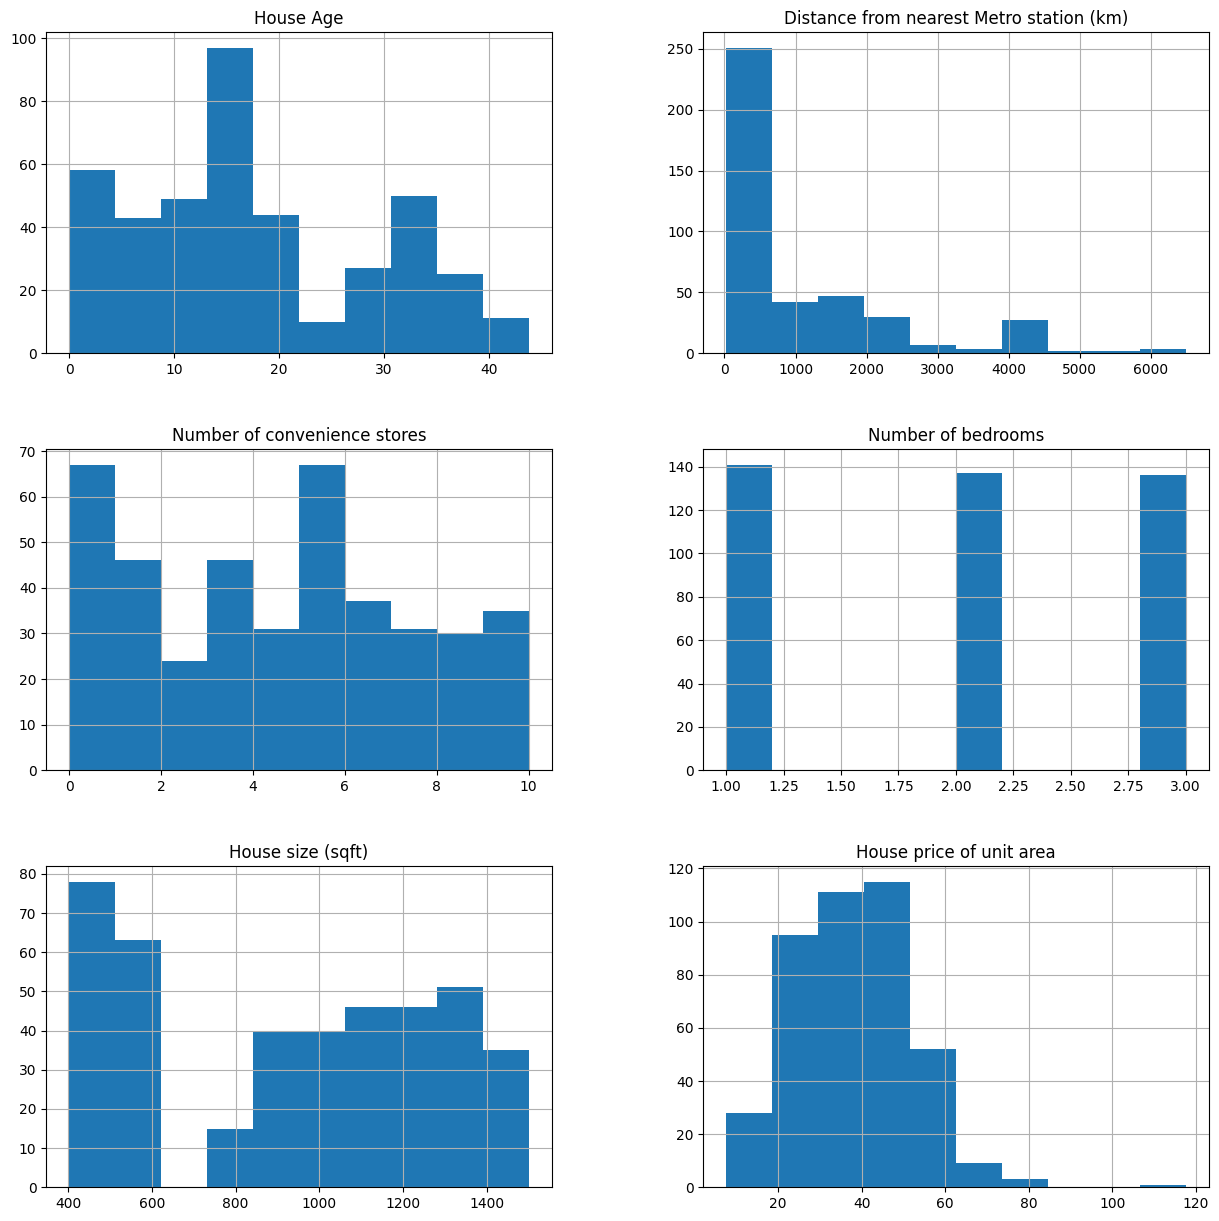

In [38]:
# histogram 
data.hist(figsize=(15, 15))

<AxesSubplot: >

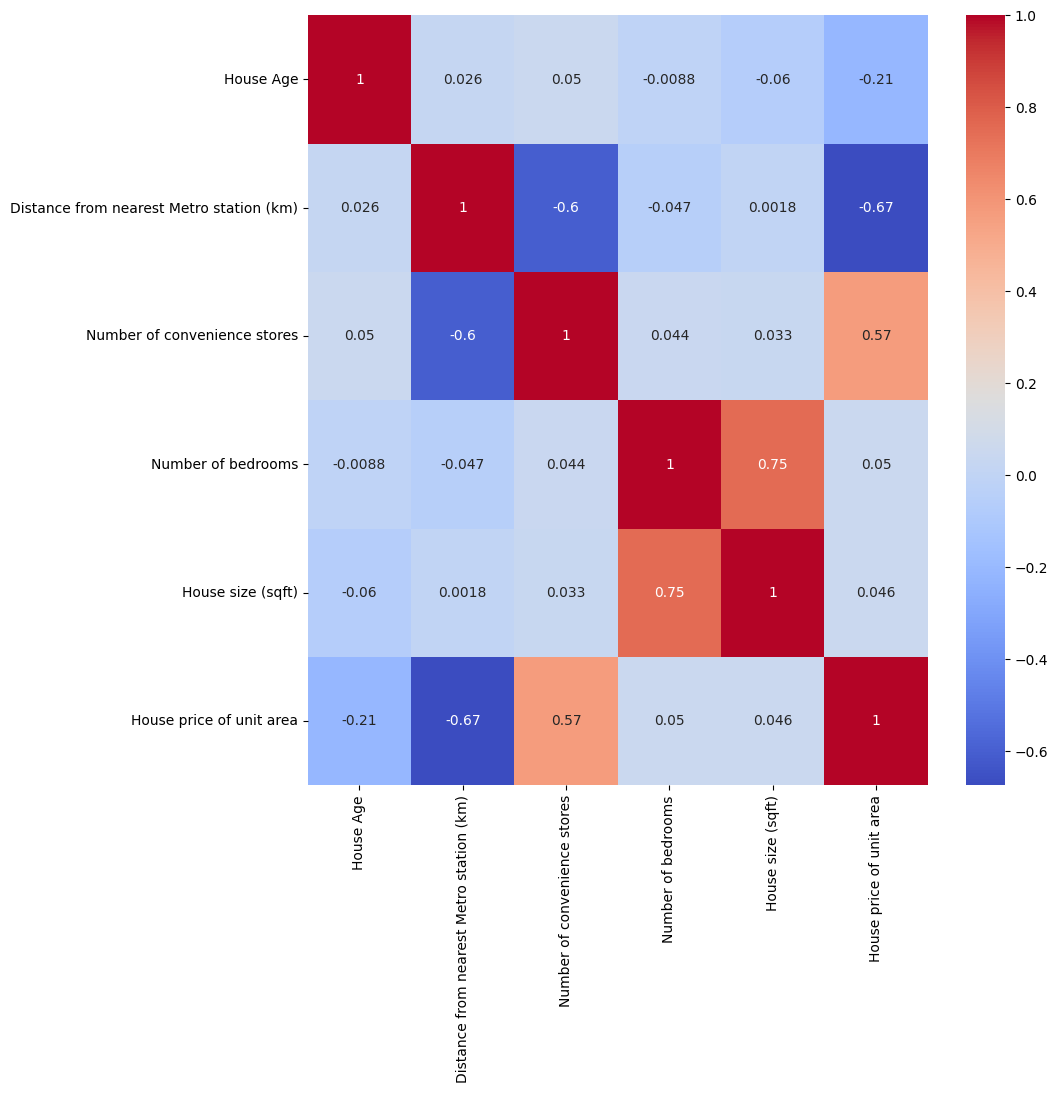

In [39]:
# corelation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


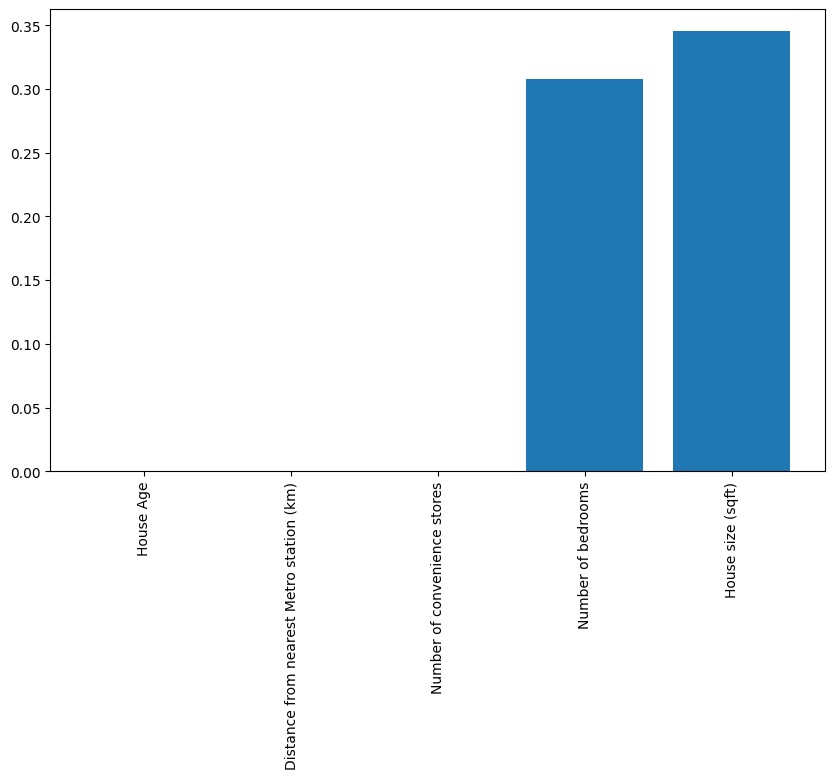

In [40]:
# peasron corelation with 'House price of unit area'
from scipy.stats import pearsonr

target = 'House price of unit area'
features = list(data.columns)
features.remove(target)

p_value = []

for feature in features:
    p_value.append(pearsonr(data[feature], data[target])[1])

plt.figure(figsize=(10, 6))
plt.bar(features, p_value)
plt.xticks(rotation=90)
plt.show()



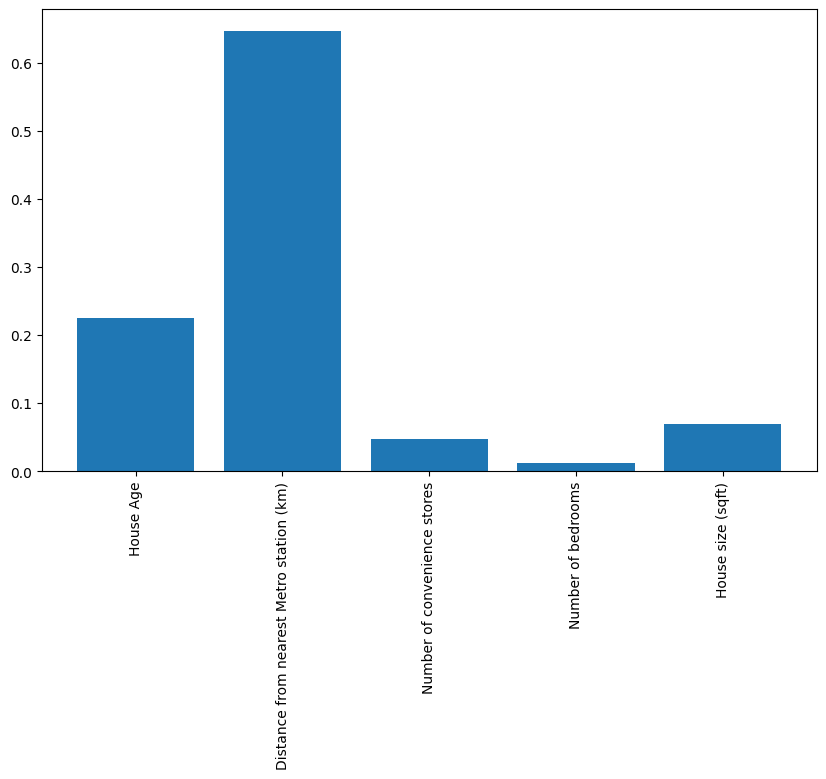

In [41]:
# feature importance
from sklearn.ensemble import RandomForestRegressor

X = data.drop(columns=[target])
y = data[target]

model = RandomForestRegressor()
model.fit(X, y)

importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, importance)
plt.xticks(rotation=90)
plt.show()

In [42]:
X = data[features]
y = data[target]

In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

In [45]:
from xgboost import XGBRegressor

model = XGBRegressor(
    max_depth=1
    )

model.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
from sklearn.metrics import mean_squared_error

pred_y = model.predict(test_X)
mean_squared_error(test_y, pred_y)

53.34630892803499